In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import rcParams
import seaborn as sns
rcParams['font.size'] = 16

# 2M1


c.) Observed sequence: $L, W, W, L, W, W, W$

Prior distribution: uniform

In [8]:
n = 7
k = 5

grid_size = 10000
param_grid = np.linspace(0, 1, grid_size)

prior = np.ones(grid_size)
likelihood = st.binom.pmf(k, n=n, p=param_grid)
unstd_posterior = likelihood * prior

posterior = unstd_posterior/unstd_posterior.sum()
    
eps = 10**-12
assert(abs(np.sum(posterior) - 1) <= eps)

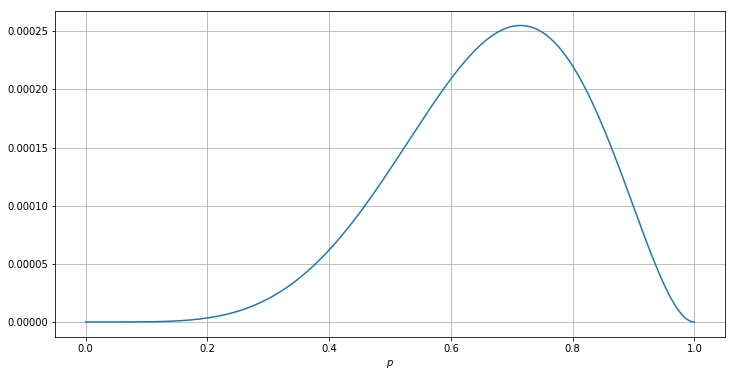

In [9]:
fig, ax = plt.subplots(figsize = [12, 6])
ax.plot(param_grid, posterior)
ax.set_xlabel('$p$')
ax.grid()

# 2M2

Same observed sequence.

Prior distribution: step function

In [10]:
step_prior = np.zeros(grid_size)
step_prior[grid_size//2:] = 2

unstd_step_posterior = likelihood * step_prior
step_posterior = unstd_step_posterior/unstd_step_posterior.sum()

assert(abs(np.sum(step_posterior) - 1) <= eps)

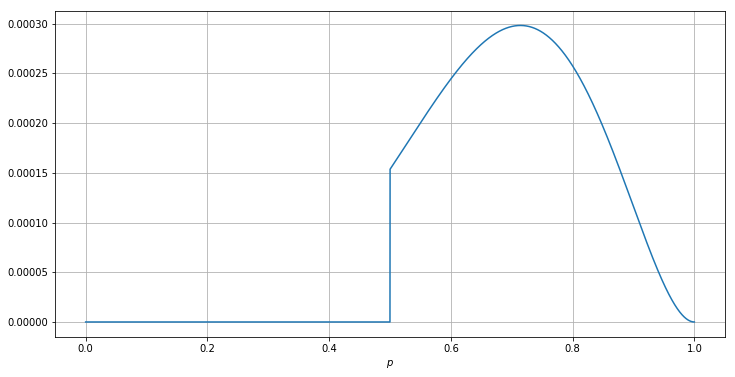

In [11]:
fig, ax = plt.subplots(figsize = [12, 6])
ax.plot(param_grid, step_posterior)
ax.set_xlabel('$p$')
ax.grid()

# 3H1

In [7]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])

birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

In [8]:
total_births = len(birth1) + len(birth2)
total_boys = np.sum(birth1+birth2)

In [9]:
birth_prior = np.ones(grid_size)
likelihood = st.binom.pmf(k=total_boys, n=total_births, p=param_grid)
ustd_bpost = likelihood * birth_prior

boy_posterior = ustd_bpost/np.sum(ustd_bpost)
MAP = round(param_grid[np.argmax(boy_posterior)], 3)
assert(abs(np.sum(boy_posterior) - 1) <= eps)

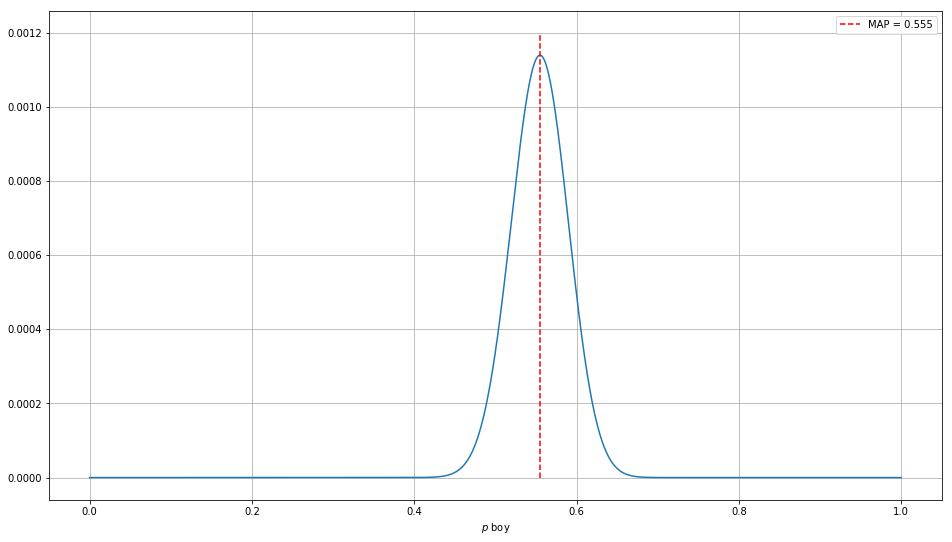

In [36]:
fig, ax = plt.subplots(figsize = [16, 9])
ax.plot(param_grid, boy_posterior)
ax.plot([MAP, MAP], [0, 0.0012], linestyle='--', color='red', label=f'MAP = {MAP}')
ax.set_xlabel('$p$ boy')
ax.grid()
_=ax.legend()

# 3H3

In [31]:
samples = np.random.choice(param_grid, p=boy_posterior, size=10000)
birth_sim = np.random.binomial(200, p=samples, size=10000)

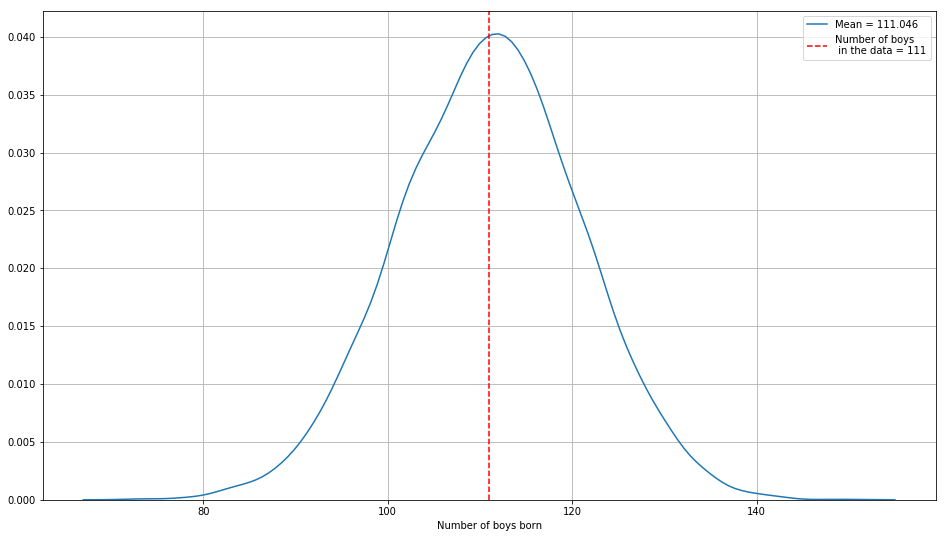

In [37]:
fig, ax = plt.subplots(figsize=[16, 9])
sns.distplot(birth_sim, hist=False, label=f'Mean = {np.mean(birth_sim)}')
ax.plot([total_boys, total_boys], [0, 0.05], color='red', linestyle='--', 
        label=f'Number of boys\n in the data = {total_boys}')
ax.grid()
ax.legend()
_ = ax.set_xlabel('Number of boys born')

# 3H5

In [42]:
fb_girls = birth1[birth1 == 0]
print(len(fb_girls))
sb_boys = birth2[np.logical_and(birth1 == 0, birth2 == 1)]
print(len(sb_boys))

49
39


In [44]:
sb_samples = np.random.choice(param_grid, p=boy_posterior, size=10000)
sb_sim = np.random.binomial(n=49, p=sb_samples, size=10000)

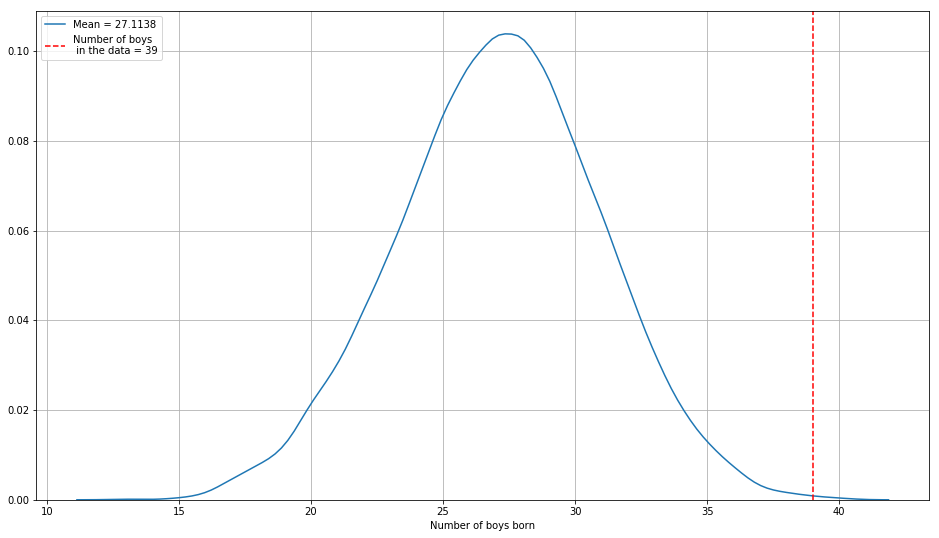

In [47]:
fig, ax = plt.subplots(figsize=[16, 9])
sns.distplot(sb_sim, hist=False, label=f'Mean = {np.mean(sb_sim)}')
ax.plot([len(sb_boys), len(sb_boys)], [0, 0.11], color='red', linestyle='--', 
        label=f'Number of boys\n in the data = {len(sb_boys)}')
ax.grid()
ax.legend()
_ = ax.set_xlabel('Number of boys born')

Looks like births are dependent